# Лабораторная работа №4: Частотный анализ полиномиальных приближений с использованием формул численного интегрирования

Выполнили студенты гр. 9383 Рыбников Роман и Сергиенкова Анастасия. Вариант №9

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

Формула прямоугольников:

$$\displaystyle y_{n+1} = y_n + s_{n+\frac{1}{2}}, y_0=0$$

Формула трапеций:

$$\displaystyle y_{n+1} = y_n + \dfrac{1}{2}\big(s_n + s_{n+1}\big), y_0=0$$

Формула Симпсона:

$$\displaystyle y_{n+1} = y_n + \dfrac{1}{3}\big(s_{n-1}+4s_n+s_{n+1}\big), y_0=0$$

Формула Ньютона-Котеса:

$$\displaystyle y_{n+2} = y_{n-1} + \dfrac{1}{8}\big(x_{n+2}+3x_{n+1}+3x_n+x_{n-1}\big)$$

Дискретный фильтр:

Дискретный фильтр представляет собой ту или иную систему обработки дискретного сигнала, обладающую свойствами:

    a. линейности – выходная реакция системы на линейную комбинацию входных сигналов равна такой же линейной комбинации ее реакций на каждый из этих сигналов отдельности;
    b. стационарности – задержка входного сигнала приводит к такой же задержке выходного сигнала без изменения его формы.

Дискретный фильтр должен обладать «памятью» т.е каждый отсчет выходного сигнала определяется в результате обработки нескольких (более одного) отсчетов входного сигнала.

Дискретный фильтр может быть задан в виде:

$$y_k=b_0x_k+b_1x_{k-1}+\dots+b_nx_{k-n}-a_1y_{k-1}-a_2y_{k-2}-\dots-a_my_{k-m}$$

Если $a_k=0$, то получим нерекурсивный фильтр. В иных случаях получаем рекурсивный фильтр.

Передаточная функция:

$$\displaystyle H(z)=\dfrac{b_0+b_1z^{-1}+b_2z^{-2}+\dots+b_nz^{-n}}{a_1z^{-1}+a_2z^{-2}+\dots+a_mz^{-m}}$$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import pi

In [2]:
def plot(df, yl, t, title="Blank Title"):
    sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
    ax = sns.relplot(data=df, x='t', y='vals', hue='', linewidth=1.7,
                 kind='line', height=8.27, aspect=11.7/8.27)
    ax.set_axis_labels(r'$t$', r'$\tilde H(t)$')
    ax.set(ylim=yl)
    plt.title(title)
    plt.show()
    
def plot_(df, yl, t, y, title="Blank Title"):
    sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
    ax = sns.relplot(data=df, x='t', y=y, linewidth=1.7,
                 kind='line', height=8.27, aspect=11.7/8.27)
    ax.set_axis_labels(r'$t$', r'$\tilde H(t)$')
    ax.set(ylim=yl)
    plt.title(title)
    plt.show()

### Пункт 1

$\bullet$ Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.

$\textbf{Формула прямоугольников:}$

$$y_{n+1} = y_n+s_{n+\frac{1}{2}}$$, где $y_0 = 0$

Пусть $s_n = e^{i\omega n}$, $y_n = H(\omega)\cdot e^{i\omega n}$, тогда:

$$
\left\{
\begin{array}{l}
    \displaystyle y_{n+1} = H(\omega)\cdot e^{i\omega n} + e^{i\omega(n+\frac{1}{2})}     \\[10pt]
    \displaystyle y_{n+1} = H(\omega)\cdot e^{i\omega (n+1)}
  \end{array}
  \right.
$$

$$\displaystyle H(\omega)\big(e^{i\omega n}\cdot e^{i\omega}\big) = H(\omega)e^{i\omega n}+e^{i\omega n}\cdot e^{\frac{1}{2}i\omega}$$

$$\displaystyle H(\omega)\big(e^{i\omega n}\cdot e^{i\omega} - e^{i\omega n}\big) = e^{i\omega n}\cdot e^{\frac{1}{2}i\omega}$$

$$\displaystyle H(\omega)\big(e^{i\omega}-1\big)=e^{\frac{1}{2}i\omega}$$

$$\displaystyle H(\omega) = \dfrac{1}{e^{\frac{i\omega}{2}}-e^{-\frac{i\omega}{2}}} = \dfrac{1}{2\cdot isin\big(\frac{\omega}{2}\big)}$$

$$\displaystyle \tilde H(f) = \dfrac{1}{2\cdot isin\big(\pi f\big)}$$

Точное значение интеграла $\displaystyle e^{i\omega t}$ равно $\displaystyle \frac{e^{i\omega n}}{i\omega}$, тогда отношение значений:

$$\gamma = \dfrac{i\omega}{2i\cdot sin\big(\dfrac{\omega}{2}\big)} = \dfrac{\frac{\omega}{2}}{sin\big(\dfrac{\omega}{2}\big)} = 1 + \dfrac{x^2}{24} + \dfrac{7x^4}{5760} + \dots$$

$$\displaystyle \gamma = \dfrac{\pi f}{sin(\pi f)} = 1 + \dfrac{\pi f}{6} + \dfrac{7\pi^4f^4}{360} + \dots$$

$\textbf{Формула трапеций:}$

$$\displaystyle y_{n+1} = y_n+\frac{1}{2}\big(s_n + s_{n+1}\big)$$, где $y_0 = 0$

Пусть $\displaystyle s_n = e^{i\omega n}, y_n = H(\omega)\cdot e^{i\omega n}$, тогда:

$$
\left\{
\begin{array}
    \displaystyle y_{n+1} = H(\omega)\cdot e^{i\omega n} + \dfrac{e^{i\omega n} + e^{i\omega\cdot(n+1)}}{2}       \\[10pt] 
    \displaystyle y_{n+1} = H(\omega)\cdot e^{i\omega (n+1)}
  \end{array}
  \right.
$$

$$\displaystyle H(\omega)\big(e^{i\omega n}\cdot e^{i\omega}\big) = H(\omega)\cdot e^{i\omega n} + e^{i\omega n}\cdot \dfrac{1+e^{i\omega}}{2}\\
\displaystyle H(\omega)\big(e^{i\omega}-1\big) = \dfrac{1+e^{i\omega}}{2}$$

$$\displaystyle H(\omega) = \frac{1+e^{i\omega}}{2\cdot(e^{i\omega}-1)} = \dfrac{cos\big(\frac{\omega}{2}\big)}{2i\cdot sin\big(\frac{w}{2}\big)}\\
\tilde H(f) = \dfrac{cos(\pi f)}{2i\cdot sin(\pi f)}$$

Точное значение интеграла $\displaystyle e^{i\omega t}$ равно $\displaystyle \frac{e^{i\omega n}}{i\omega}$, тогда отношение значений:

$$\gamma = cos\Big(\dfrac{\omega}{2}\Big)\cdot\dfrac{\frac{\omega}{2}}{sin\big(\frac{\omega}{2}\big)} = 1 - \dfrac{\omega^2}{12} + \dfrac{\omega^4}{720} + \dots$$

$$\displaystyle \gamma = cos(\pi f)\cdot\dfrac{\pi f}{sin(\pi f)} = 1 - \dfrac{\pi^2\omega^2}{3}+\dfrac{\pi^4\omega^4}{45} + \dots$$

$\textbf{Формула трапеций:}$
$$\displaystyle y_{n+1} = y_{n-1} + \frac{1}{3}\cdot\big(s_{n-1} + 4s_n+s_{n+1}\big)$$, где $y_0 = 0$

Пусть $\displaystyle s_n = e^{i\omega n}, y_n = H(\omega)\cdot e^{i\omega n}$, тогда:

$$
\left\{
\begin{array}
    \displaystyle y_{n+1} = H(\omega)\cdot e^{i\omega (n-1)} + \dfrac{e^{i\omega (n-1)}+4e^{i\omega n}+e^{i\omega(n+1)}}{3}       \\[10pt]
    \displaystyle y_{n+1} = H(\omega)\cdot e^{i\omega (n+1)}
  \end{array}
  \right.
$$

$$\displaystyle H(\omega)\big(e^{i\omega n}\cdot e^{i\omega}\big) = H(\omega)e^{i\omega n}e^{-i\omega}\cdot\dfrac{e^{-i\omega}+4+e^{i\omega}}{3}$$

$$\displaystyle H(\omega)\big(e^{i\omega}-e^{-i\omega}\big) = \dfrac{e^{-i\omega}+4+e^{i\omega}}{3}$$

$$\displaystyle H(\omega)=\dfrac{e^{-i\omega}+4+e^{i\omega}}{3\cdot\big(e^{i\omega}-e^{-i\omega}\big)} = \dfrac{cos(\omega)+2}{3i\cdot sin(\omega)}$$

$$\displaystyle \tilde H(f) = \dfrac{cos(2\pi f)+2}{3i\cdot sin(2\pi f)}$$

Точное значение интеграла $\displaystyle e^{i\omega t}$ равно $\displaystyle \dfrac{e^{i\omega n}}{i\omega}$, тогда отношение значений:

$$\gamma =\frac{(cos(\omega)+2)\cdot i\omega}{3i\cdot sin(\omega)} = \frac{cos(\omega)+2}{3}\cdot\frac{\omega}{sin(\omega)} = 1 + \frac{\omega^4}{180}+\dots \\
\gamma = \frac{cos(2\pi f)}{3}\cdot\frac{2\pi f}{sin(2\pi f)} = 1+\frac{4\pi^4f^4}{45}+\dots$$

In [3]:
t = np.linspace(0.001, 0.5, 1000)

In [4]:
H_rect = lambda f: (1/(2j*np.sin(pi*f))).imag
H_trap = lambda f: (np.cos(pi*f)/(2j*np.sin(pi*f))).imag
H_simpson = lambda f: ((np.cos(2*pi*f)+2)/(3j*np.sin(2*pi*f))).imag

In [5]:
K_rect = lambda f: pi*f/(np.sin(pi * f))
K_trap = lambda f: np.cos(pi * f)*(pi*f/np.sin(f*pi))
K_simpson = lambda f: ((np.cos(2*pi*f)+2)/3)*((2*pi*f)/(np.sin(2*pi*f)))

In [6]:
df_H = pd.DataFrame({'t': t, r'$H_{trap}$': H_trap(t), r'$H_{simpson}$': H_simpson(t), r'$H_{rect}$': H_rect(t)})
df_K = pd.DataFrame({'t': t, r'$K_{trap}$': K_trap(t), r'$K_{simpson}$': K_simpson(t), r'$K_{rect}$': K_rect(t)})

df_H_p1 = df_H.melt(id_vars='t', var_name='', value_name='vals')
df_K_p1 = df_K.melt(id_vars='t', var_name='', value_name='vals')

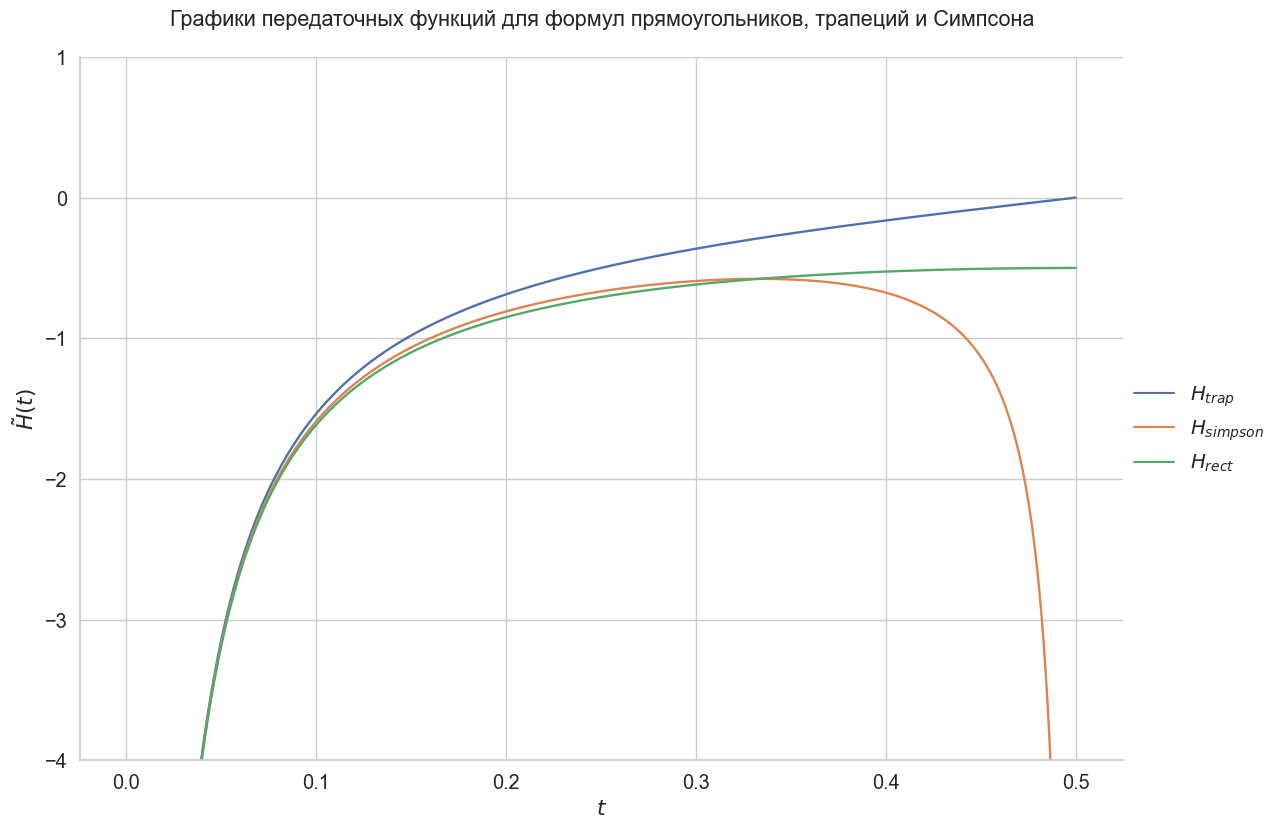

In [7]:
title = "Графики передаточных функций для формул прямоугольников, трапеций и Симпсона\n"
plot(df_H_p1, (-4,1), t, title)

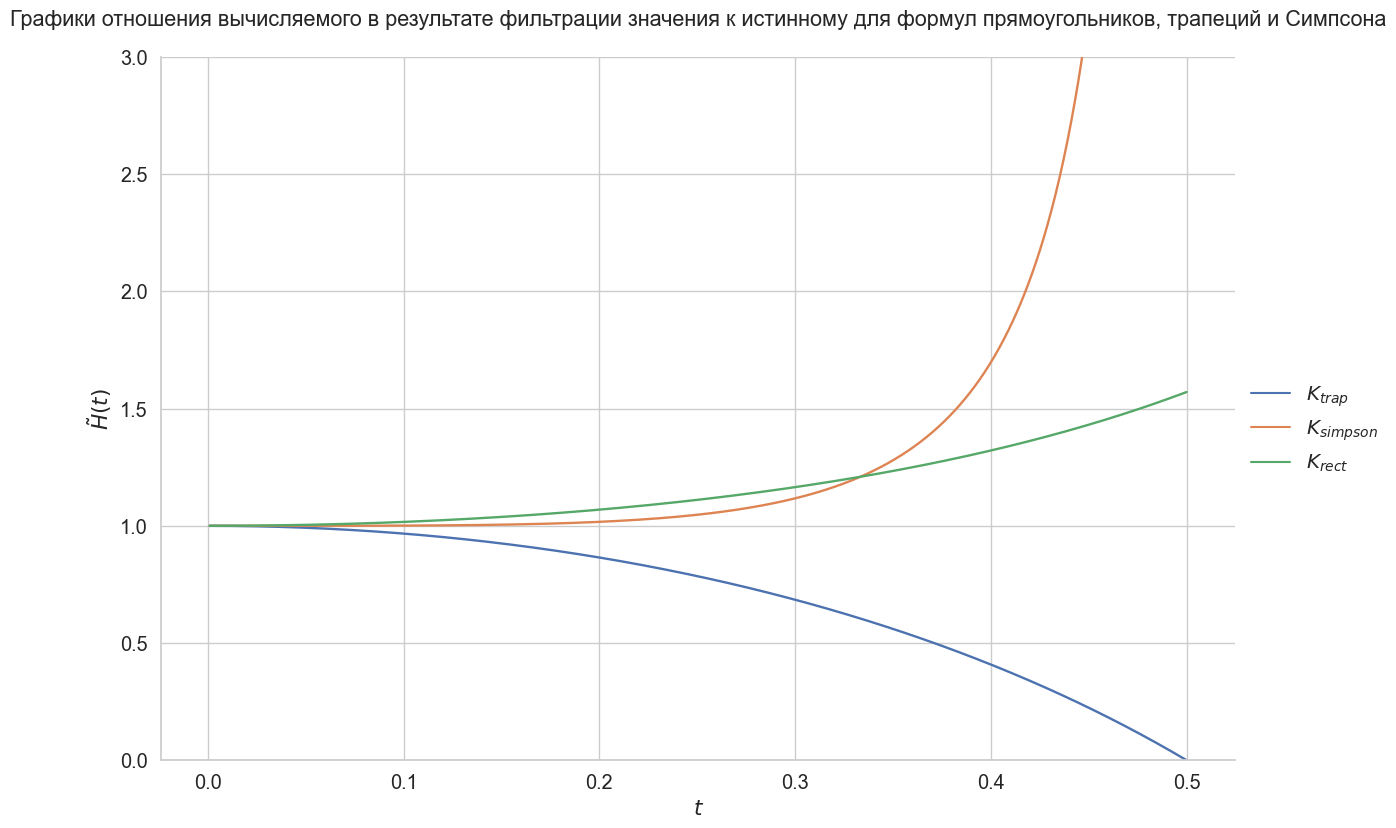

In [8]:
title = "Графики отношения вычисляемого в результате фильтрации значения к истинному для формул прямоугольников, трапеций и Симпсона\n"

plot(df_K_p1, (0,3), t, title)

### Пункт 2

$\bullet$ Вывести формулу передаточной функции рекурсивного фильтра для интегрирования «по правилу 3/8»:

$$\displaystyle y_{n+2} = y_{n-1} +\frac{1}{8}\big(x_{n+2}+3x_{n+1}+3x_n+x_{n-1}\big)$$

$\bullet$ Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.

Пусть $\displaystyle s_n = e^{i\omega n}$, тогда:

$$
\left\{
\begin{array}
    \displaystyle y_{n+2} = H(\omega)\cdot e^{i\omega (n-1)} + \dfrac{e^{i\omega(n+2)} + 3e^{i\omega(n+1)}+3e^{i\omega n} + e^{i\omega (n-1)}}{8}       \\[10pt]
    \displaystyle y_{n+2} = H(\omega)\cdot e^{i\omega (n+2)}
  \end{array}
  \right.
$$

$$\displaystyle H(\omega)\big(e^{i\omega n}\big) = H(\omega)e^{i\omega n}e^{-i\omega}+e^{i\omega n}\cdot \dfrac{e^{2i\omega}+3e^{3i\omega}+3+e^{-i\omega}}{8}$$

$$\displaystyle H(\omega)\big(e^{2i\omega} - e^{-i\omega}\big) = \dfrac{e^{2i\omega}+3e^{i\omega}+3+e^{-i\omega}}{8\big(e^{2i\omega}-e^{-i\omega}\big)}\cdot\dfrac{e^{-\frac{i\omega}{2}}}{e^{-\frac{2}{i\omega}{}}}$$

$$\displaystyle H(\omega)=\dfrac{e^{\frac{3i\omega}{2}}+3e^{\frac{3i\omega}{2}}+3e^{-\frac{i\omega}{2}}+e^{-\frac{3i\omega}{2}}}{8\cdot\big(e^{\frac{3i\omega}{2}}-e^{-\frac{3i\omega}{2}}\big)}=\dfrac{2\cdot cos\big(\frac{3\omega}{2}\big)+6\cdot cos\big(\frac{\omega}{2}\big)}{16i\cdot sin\big(\frac{3\omega}{2}\big)}$$

$$\displaystyle \tilde H(f) = \dfrac{cos\big(3\pi f\big)+3\cdot cos\big(\pi f\big)}{8i\cdot sin\big(3\pi f\big)}$$

Точное значение интеграла $\displaystyle e^{i\omega t}$ равно $\displaystyle \dfrac{e^{i\omega n}}{i\omega}$, тогда отношение значений:

$$\displaystyle \gamma = \omega\cdot\dfrac{cos\big(\frac{3\omega}{2}\big)+3\cdot cos\big(\frac{\omega}{2}\big)}{8\cdot sin\big(\frac{3\omega}{2}\big)} = \frac{1}{12}\Bigg(cos\bigg(\frac{3\omega}{2}\bigg)+3\cdot cos\bigg(\frac{\omega}{2}\bigg)\Bigg)\cdot\dfrac{\frac{3\omega}{2}}{sin\big(\frac{3\omega}{2}\big)}$$

$$\displaystyle \gamma = \frac{1}{12}\cdot \Big(cos\big(3\pi f\big)+3\cdot cos\big(\pi f\big)\Big)\cdot \dfrac{\frac{3\omega}{2}}{sin\big(\frac{3\omega}{2}\big)}$$

In [9]:
t = np.linspace(0.001, 0.5, 1000)
H = lambda f: ((np.cos(3*pi*f)+3*np.cos(pi*f))/(8j*np.sin(3*pi*f))).imag
K = lambda f: (1/12)*(np.cos(3*pi*f)+3*np.cos(pi*f))*((3*pi*f)/np.sin(3*pi*f))

df_H = pd.DataFrame({'t': t, 'H': H(t)})
df_K = pd.DataFrame({'t': t, 'K': K(t)})

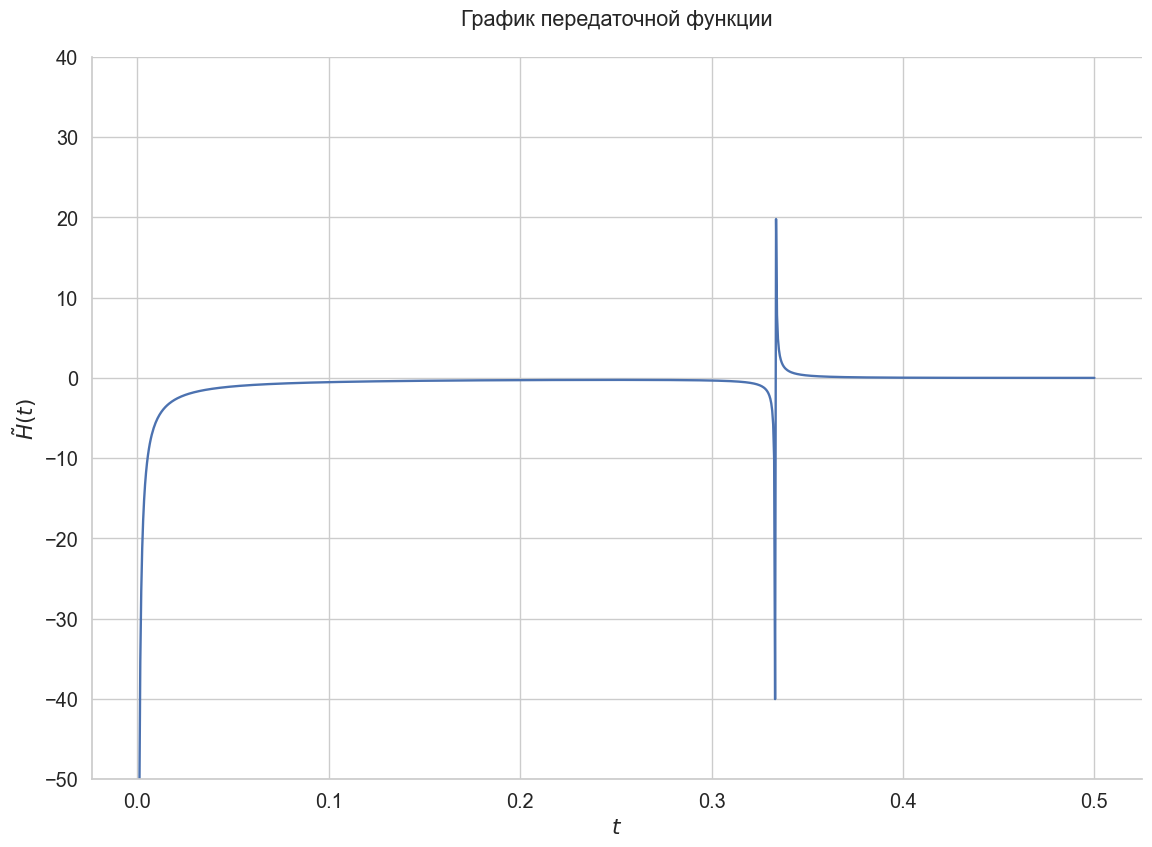

In [10]:
title = "График передаточной функции\n"
plot_(df_H, (-50,40), t, 'H', title)

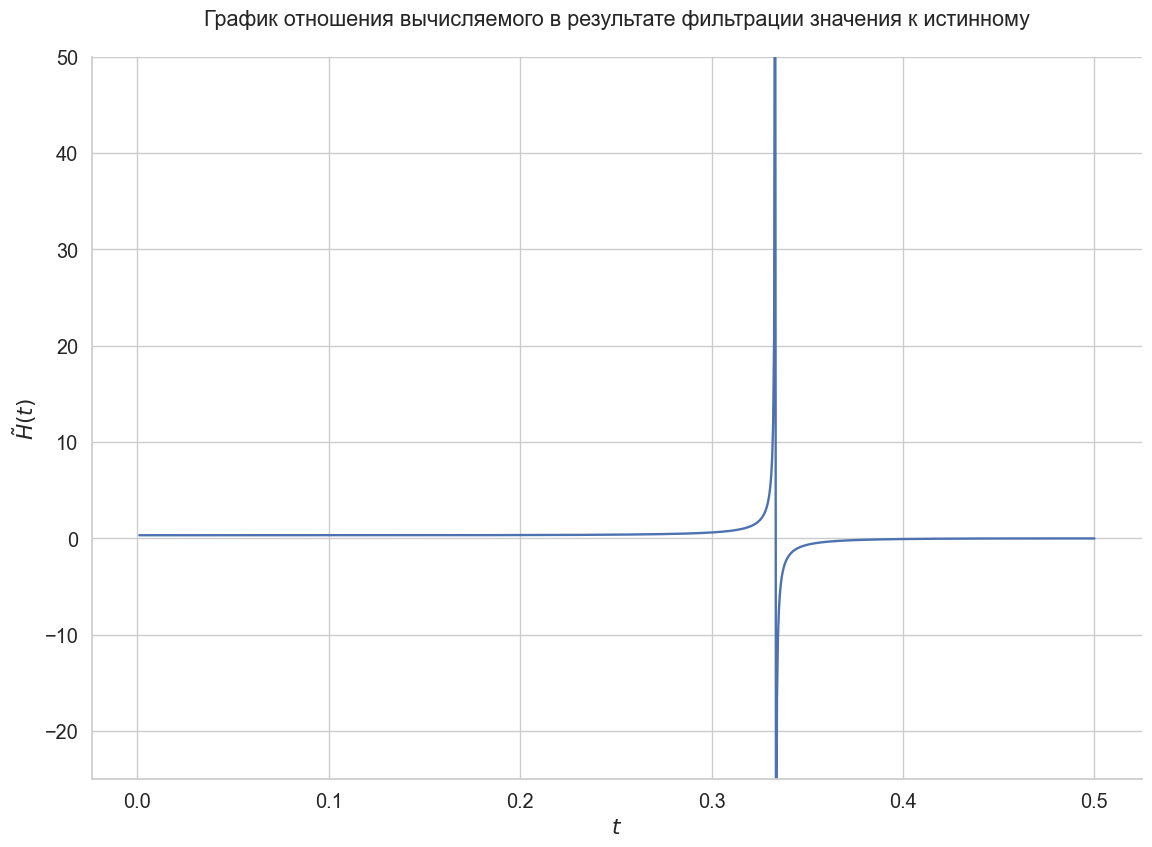

In [11]:
title = "График отношения вычисляемого в результате фильтрации значения к истинному\n"
plot_(df_K, (-25,50), t, 'K', title)

### Пункт 3

$\bullet$ Провести сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении п. 1 и 2.

Анализируя графики передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций, Симпсона, а также формуле для интегрирования «по правилу 3/8», можно сказать, что:

1. Формула трапеций приводит к подавлению высоких частот, а формулы прямоугольников и Симпсона приводят к обратному – они усиливают высокие частоты.

2. С увеличением частоты точность интегрирования «по правилу 3/8» падает. При этом при средних частотах (около $\dfrac{1}{3}$ Гц) вычисленный результат становится много больше истинного значения интеграла. При увеличении частоты выше $\dfrac{1}{3}$ Гц результат интегрирования стремительно уменьшается относительно истинного значения интеграла

## Выводы

В ходе выполнения лабораторной работы был проведён анализ частотных характеристик передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона, а также для интегрирования «по правилу 3/8». Получены формулы для передаточных функций рекурсивных фильтров и построены соответствующие графики. В ходе анализа были сделан вывод, что формула трапеций приводит к подавлению высоких частот, а формулы прямоугольников и Симпсона приводят к обратному – они усиливают высокие частоты. Интегрирование «по правилу 3/8» даёт сравнительно точный результат, но с увеличением частоты точность интегрирования падает.